In [123]:
import matplotlib.pyplot as plt
from astropy.io import fits
import pandas as pd
import itertools
import numpy as np
%matplotlib inline
import seaborn as sns

In [ ]:
file = '/Users/ballanr/Desktop/File Outputs/DR13/DR13 Protostars.csv'
openfile = pd.read_csv(file)
x1 = openfile['Model Temp']
x = np.log(x1)

y = openfile['Model Density']

In [ ]:
plt.figure(figsize=(20,10))
plt.hist2d(x1, y,bins=(8,21),cmap='gnuplot')
plt.xlabel('x')
plt.ylabel('y')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Counts')
plt.show()

In [ ]:
plt.figure(figsize=(13,10))
plt.hexbin(x, y,gridsize=8,cmap='jet')
plt.xlabel('Log Temp')
plt.ylabel('Log Density')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Counts')
#plt.savefig('/Users/ballanr/Desktop/2D Hist.pdf',dpi=300)
plt.show()

In [ ]:
import corner
import numpy as np

In [ ]:
z=np.column_stack((x, y))
z1 = np.column_stack((x1,y))

In [ ]:
ye = np.exp(y)


In [ ]:
ze = np.column_stack((x1,ye))

In [ ]:
fig = corner.corner(z,smooth=1,bins=(9,23),labels=['Log Temp','Log Density'],
                   quantiles=[0.5])
fig
fig.savefig('corner.pdf')

In [ ]:
fig1 = corner.corner(z1,smooth=1,bins=(9,23),labels=['Temp','Log Density'],
                   quantiles=[0.5])
fig1
fig1.savefig('corner1.pdf')

In [ ]:
fig2 = corner.corner(ze,smooth=2,bins=(9,23),labels=['Temp','Density'],
                   quantiles=[0.25,0.5,0.75])
fig2
fig2.savefig('corner2.pdf')

In [ ]:
plt.clf()
plt.close()

In [ ]:
zmult = x*y

In [ ]:
min(zmult),max(zmult),len(zmult)

In [ ]:
xz = np.asarray(np.linspace(65,120,754))
zz = np.column_stack((xz,z))

In [ ]:
corner.corner(zz,bins=(8,10))

In [ ]:
plt.hist(zz,bins=100)
plt.show()

In [ ]:
def BrackettDR13(input1,input2,input3):
    
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np
    import itertools
    file = '/Users/ballanr/Desktop/File Outputs/DR13/DR13 Protostars.csv'
    openfile = pd.read_csv(file)
    for index,row in itertools.islice(openfile.iterrows(),0,None):

        plate = str(int(row['Plate ID']))

        if plate == input1:

            mjd = str(int(row['MJD']))

            if mjd == input2:

                fiber = str(row['Fiber'])

                if len(str(fiber)) == 3:
                    fiber = str(fiber)
                elif len(str(fiber)) == 2:
                    fiber = '0' + str(fiber) 
                else:
                    fiber = '00' + str(fiber)

                if fiber == input3:

                    density = str(row['Model Density'])
                    #if density == '8' or density == '9' or density == '10' or density == '11' or density == '12':
                    #    density = density + str(.0)

                    temp = str(int(row['Model Temp'])) + ' K'
                    print(density,temp)
                    equivs = np.asarray((row['Br11 EqW'],row['Br12 EqW'],row['Br13 EqW'],row['Br14 EqW'],row['Br15 EqW'],
                             row['Br16 EqW'],row['Br17 EqW'],row['Br18 EqW'],row['Br19 EqW'],row['Br20 EqW']))

                    equivs = equivs / equivs[0]

                    filename = '/Users/ballanr/Desktop/File Outputs/Brackett Decrements/Density Files/Density ' + str(density) + ' Ratios.csv'
                    openfile1 = pd.read_csv(filename)

                    brx = openfile1['Br Line']
                    tempy = openfile1[temp]
                    tempy = tempy/tempy[0]

                    plt.figure(figsize=(18,10))
                    plt.plot(brx,equivs)
                    plt.scatter(brx,equivs)
                    plt.plot(brx,tempy)
                    plt.scatter(brx,tempy)
                    plt.show()

In [ ]:
def Brackett_noweight(input1,input2,input3):
    
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np
    import itertools
    file = '/Users/ballanr/Desktop/File Outputs/DR15/Catalog-test1.csv'
    openfile = pd.read_csv(file)
    for index,row in itertools.islice(openfile.iterrows(),0,None):

        plate = str(int(row['Plate ID']))

        if plate == input1:

            mjd = str(int(row['MJD']))

            if mjd == input2:

                fiber = str(row['Fiber'])

                if len(str(fiber)) == 3:
                    fiber = str(fiber)
                elif len(str(fiber)) == 2:
                    fiber = '0' + str(fiber) 
                else:
                    fiber = '00' + str(fiber)

                if fiber == input3:

                    density = str(row['Model Density'])
                    #if density == '8' or density == '9' or density == '10' or density == '11' or density == '12':
                    #    density = density + str(.0)

                    temp = str(int(row['Model Temp'])) + ' K'
                    print(density,temp)
                    equivs = np.asarray((row['Br11 EqW'],row['Br12 EqW'],row['Br13 EqW'],row['Br14 EqW'],row['Br15 EqW'],
                             row['Br16 EqW'],row['Br17 EqW'],row['Br18 EqW'],row['Br19 EqW'],row['Br20 EqW']))

                    equivs = equivs / equivs[0]

                    filename = '/Users/ballanr/Desktop/File Outputs/Brackett Decrements/Density Files/Density ' + str(density) + ' Ratios.csv'
                    openfile1 = pd.read_csv(filename)

                    brx = openfile1['Br Line']
                    tempy = openfile1[temp]
                    tempy = tempy/tempy[0]

                    plt.figure(figsize=(18,10))
                    plt.plot(brx,equivs)
                    plt.scatter(brx,equivs)
                    plt.plot(brx,tempy)
                    plt.scatter(brx,tempy)
                    plt.show()

In [ ]:
def Brackett_weight(input1,input2,input3):
    
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np
    import itertools
    file = '/Users/ballanr/Desktop/File Outputs/DR15/pre-DR15.csv'
    openfile = pd.read_csv(file)
    for index,row in itertools.islice(openfile.iterrows(),0,None):

        plate = str(int(row['Plate ID']))

        if plate == input1:

            mjd = str(int(row['MJD']))

            if mjd == input2:

                fiber = str(row['Fiber'])

                if len(str(fiber)) == 3:
                    fiber = str(fiber)
                elif len(str(fiber)) == 2:
                    fiber = '0' + str(fiber) 
                else:
                    fiber = '00' + str(fiber)

                if fiber == input3:

                    density = str(row['Model Density'])
                    #if density == '8' or density == '9' or density == '10' or density == '11' or density == '12':
                    #    density = density + str(.0)

                    temp = str(int(row['Model Temp'])) + ' K'
                    print(density,temp)
                    errors = np.asarray((row['Br11 Error'],row['Br12 Error'],row['Br13 Error'],row['Br14 Error'],row['Br15 Error'],
                             row['Br16 Error'],row['Br17 Error'],row['Br18 Error'],row['Br19 Error'],row['Br20 Error']))
                    equivs = np.asarray((row['Br11 EqW'],row['Br12 EqW'],row['Br13 EqW'],row['Br14 EqW'],row['Br15 EqW'],
                             row['Br16 EqW'],row['Br17 EqW'],row['Br18 EqW'],row['Br19 EqW'],row['Br20 EqW']))

                    equivs = equivs / equivs[0]

                    filename = '/Users/ballanr/Desktop/File Outputs/Brackett Decrements/Density Files/Density ' + str(density) + ' Ratios.csv'
                    openfile1 = pd.read_csv(filename)

                    brx = openfile1['Br Line']
                    tempy = openfile1[temp]
                    tempy = tempy/tempy[0]

                    plt.figure(figsize=(18,10))
                    plt.errorbar(brx,equivs,errors,ecolor='red',capsize=3,fmt='--o')
                    #plt.scatter(brx,equivs)
                    plt.plot(brx,tempy,color='green')
                    plt.scatter(brx,tempy,color='green')
                    plt.show()

In [ ]:
Brackett_weight('9288','57738','003')

In [ ]:
plate = '9288'
mjd = '57738'
fiber = '003'
filename1 = '/Volumes/CoveyData/APOGEE_Spectra/preDR15/apogee/spectro/redux/visits/apo25m/'+plate+'/'+mjd+'/apVisit-apogee2-'+plate+'-'+mjd+'-'+fiber+'.fits'
#filename1 = '/Volumes/CoveyData/APOGEE_Spectra/preDR15/apogee/spectro/redux/visits/lco25m/'+plate+'/'+mjd+'/asVisit-apogee2-'+plate+'-'+mjd+'-'+fiber+'.fits'
openfile = fits.open(filename1)
wave = openfile[4]
flux = openfile[1]
error = openfile[2]
x1 = wave.data[0]
x2 = wave.data[1]
x3 = wave.data[2]
y1 = flux.data[0]
y2 = flux.data[1]
y3 = flux.data[2]
z1 = error.data[0]
z2 = error.data[1]
z3 = error.data[2]
color2 = (31/255.,119/255.,180/255.)
plt.figure(figsize=(20,10));
plt.errorbar(x1,y1,yerr=z1,color=color2,ecolor='red');
plt.errorbar(x2,y2,yerr=z2,color=color2,ecolor='red');
plt.errorbar(x3,y3,yerr=z3,color=color2,ecolor='red');
plt.title(plate+'-'+mjd+'-'+fiber,fontsize=20);

plt.xlim(15300,15500);
plt.ylim(4000,8000)
plt.show();

In [ ]:
filename = '/Users/ballanr/Desktop/File Outputs/DR15/Wave and Flux/9288-57738-003.csv'
openfile1 = pd.read_csv(filename)
wave = openfile1['Wavelength']
flux = openfile1['Flux']
ferror = openfile1['Error']

line = 15560.8 #15443.2 #15346
L1 = line - 27.42
L2 = line - 17.21
R1 = line + 17.21
R2 = line + 27.42


plt.figure(figsize=(20,10))
plt.errorbar(wave,flux,ferror,color=color2,ecolor='red');
plt.axvline(line,color='red',ls='dashed')
plt.axvline(L1,color='green',ls='solid')
plt.axvline(L2,color='green',ls='solid')
plt.axvline(R1,color='green',ls='solid')
plt.axvline(R2,color='green',ls='solid')
plt.title(plate+'-'+mjd+'-'+fiber,fontsize=20);

plt.xlim(line-40,line+40);
plt.ylim(4000,8000)
plt.show();

In [ ]:
from mpl_toolkits import mplot3d

In [ ]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

In [ ]:
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
plt.show()

In [ ]:
with sns.axes_style('white'):
    #sns.jointplot("x", "y", data, kind='hex')
    sns.jointplot("x", "y", data, kind='kde');

In [101]:
file = '/Users/ballanr/Desktop/File Outputs/DR15/pre-DR15 Cutoff.csv'
data = pd.read_csv(file,usecols=['Model Density','Model Temp'])
x = data['Model Density']
y = data['Model Temp']

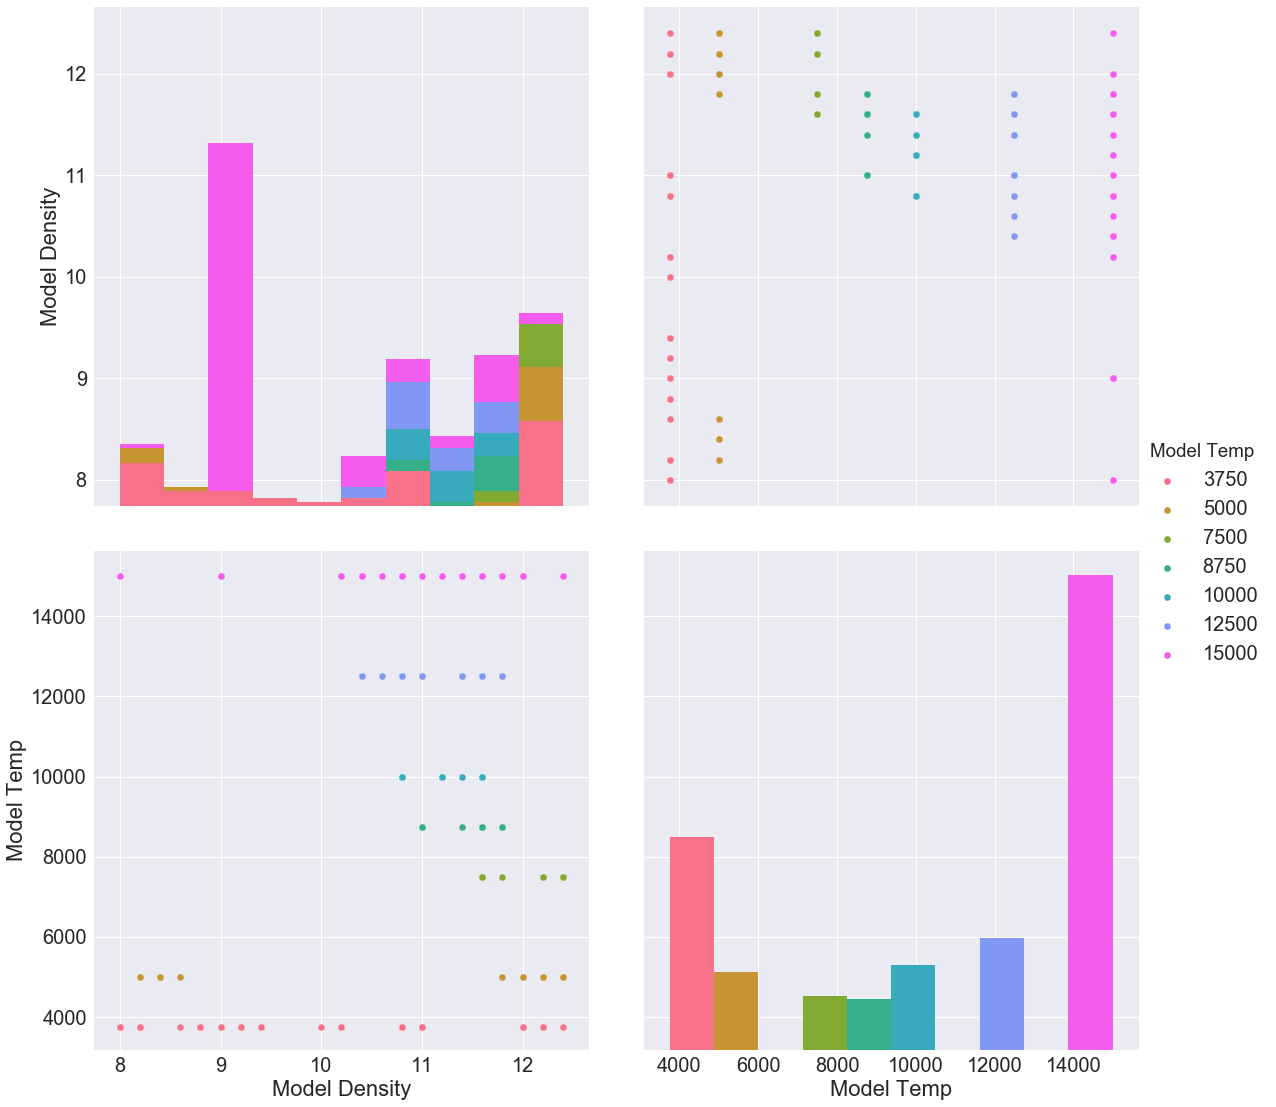

In [277]:
sns.set(font_scale=2)
g = sns.pairplot(data,hue='Model Temp',size=8)
#plt.subplots_adjust(top=0.92)
#g.fig.suptitle('Plot',fontsize=40)
plt.savefig('/Users/ballanr/Desktop/whatwhat.pdf',bbox_inches='tight',dpi=300)

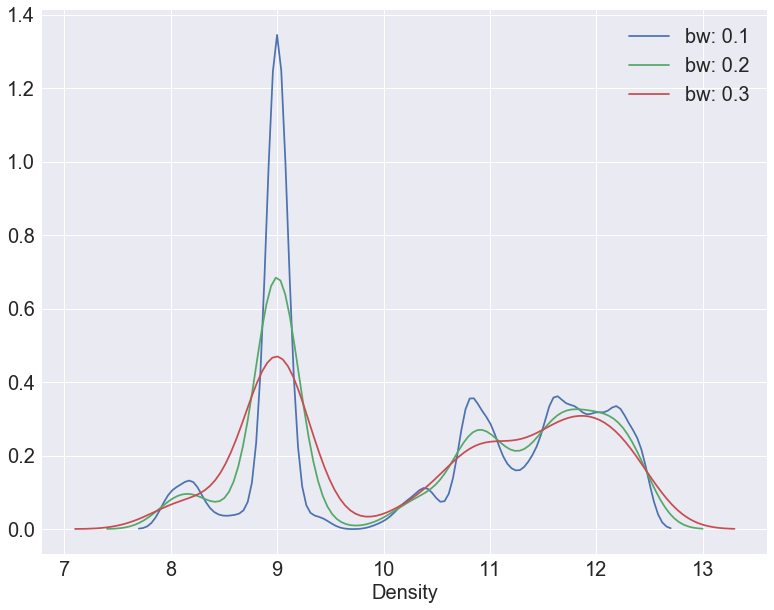

In [279]:
plt.figure(figsize=(13,10))
sns.kdeplot(x,bw=.1,label='bw: 0.1')
sns.kdeplot(x,bw=0.2,label='bw: 0.2')
sns.kdeplot(x,bw=0.3,label='bw: 0.3')
plt.xlabel('Density',fontsize=20)
#plt.title('Density KDE',fontsize=20)
#plt.legend(fontsize=20)
plt.savefig('/Users/ballanr/Desktop/blah.pdf',bbox_inches='tight',dpi=300)

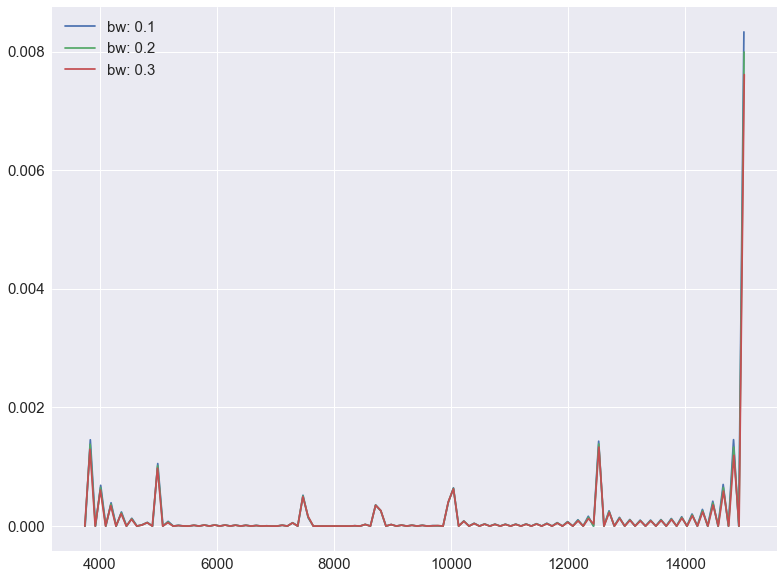

In [247]:
plt.figure(figsize=(13,10))
sns.kdeplot(y,bw=.1,label='bw: 0.1')
sns.kdeplot(y,bw=1,label='bw: 0.2')
sns.kdeplot(y,bw=2,label='bw: 0.3')

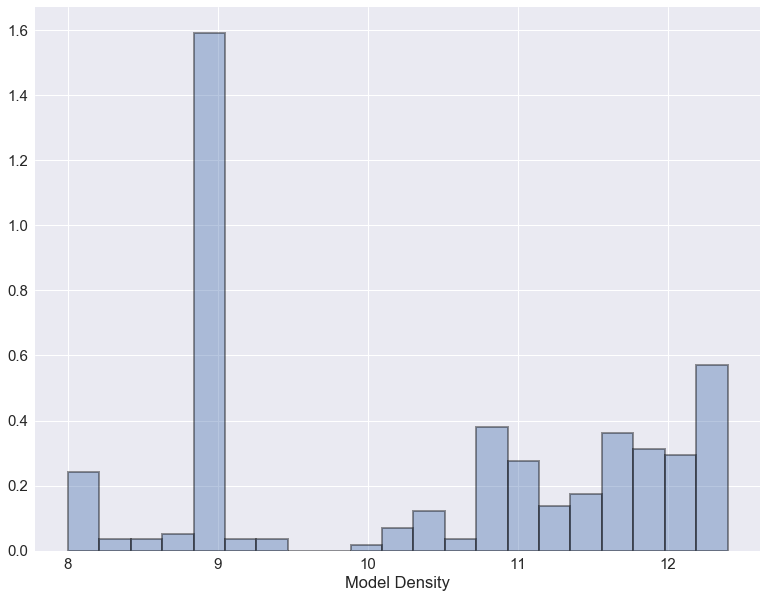

In [244]:
plt.figure(figsize=(13,10))
sns.distplot(data['Model Density'],bins=21,norm_hist=True,kde=None,
             hist_kws={'histtype':'bar','edgecolor':'k','linewidth':2,'color':colors[0]})

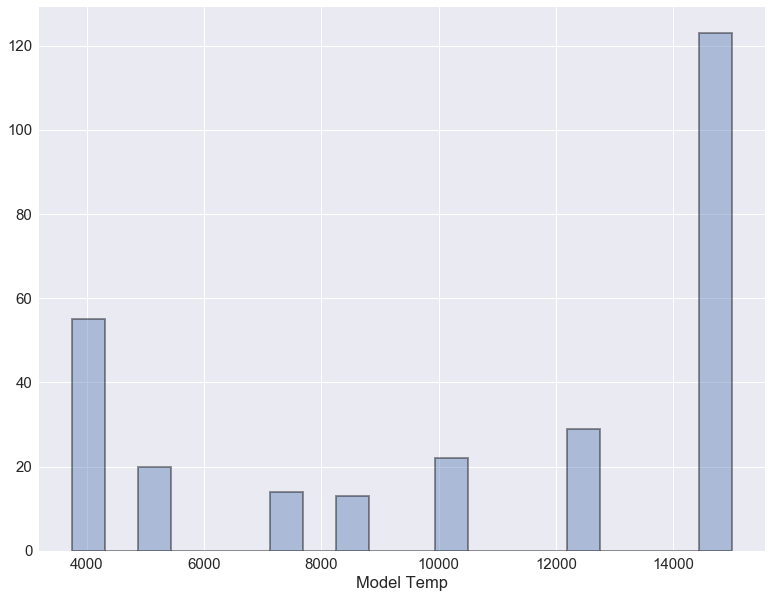

In [248]:
plt.figure(figsize=(13,10))
sns.distplot(data['Model Temp'],bins=20,kde=None,color='k',
             hist_kws={'histtype':'bar','edgecolor':'k','linewidth':2,'color':colors[0]})

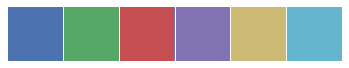

In [207]:
colors = sns.color_palette()
sns.palplot(colors)

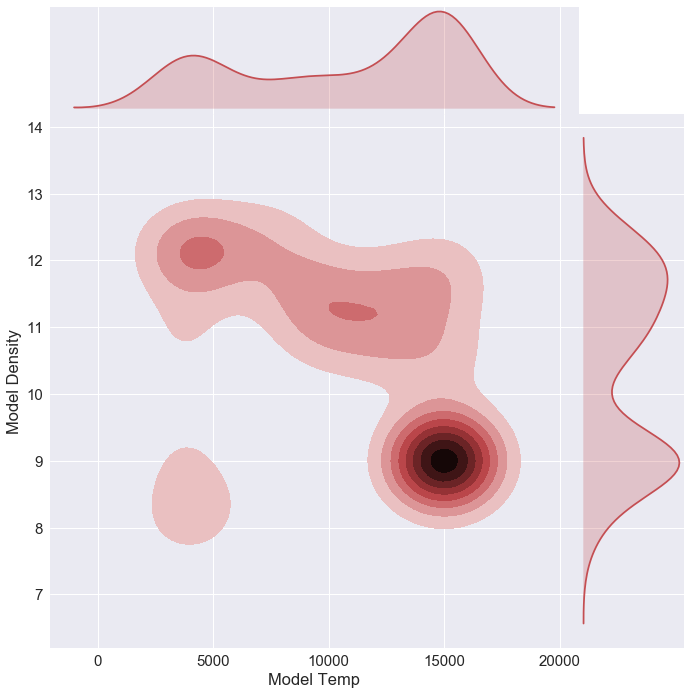

In [276]:
sns.set(font_scale=1.5)
sns.color_palette()
g = sns.jointplot(data['Model Temp'],data['Model Density'],size=10,kind='kde',space=0,stat_func=None,color=colors[2],shade_lowest=False)
#g.ax_joint.plot(np.linspace(3000, 16000),np.linspace(7, 13), ':k')
plt.savefig('/Users/ballanr/Desktop/ooooo.pdf',bbox_inches='tight',dpi=300)